# Pymaceuticals Inc.
---

### Analysis

- I have been tasked with processing and analysing the following data set relating to how effective Capomullin is as a treatment for SCC on mice against the other options within the field. After filtering out duplicates and processing the data I can say from processing the data that Capomullin is one of the best options available for treating SCC. I will explain my reasoning for this analysis below:

- I have created below a summary statistics table analysing the data after I had checked for and removed duplicates to get a quick look at how Capomullin stacks up against the other treatments. The table shows that Capomullin may not be performing as well as Ramicane (according to the table the best performing treatment) but it is doing significantly better than any other option. Being only one of 2 drugs to have an average tumour volume in the 40mm3 range (the average was: 40.675741mm3) the next closest being Propriva with an average of 52.320930mm3. Capomullin also performs incredibly well in median and variance as well but more importantly boasting a standard error of 0.329346. This low of a standard error helps me to believe the accuracy of this data as it is the 2nd best of the set and quite low within itself. Granted this can be proof of a larger sample size which is true and can be derived from the below bar chart. More time points observed for Capomullin and Ramicane then all the others do show that they had a larger share of the 248 test mice. 

-  I then decided to go a step deeper and plot some box plots relating to the final tumour volume for Capomullin against its biggest rival Ramicane and 2 middle of the pack treatments in Infubinol and Ceftamin. Doing so has managed to further prove my earlier analysis. Looking at the plots side by side we can see a few interesting things firstly being the upper and lower bounds. As discussed, earlier Capomullin is one of the best treatments in terms of its median tumour volume across the experiment which can still be seen with the 2nd lowest median line plotted across the chart which would leave me to believe it will perform just as well in other areas. However, the upper bound for Capomullin appears to be quite high for what you'd expect. This being said though as we can see from the chart Capomullins upper limits and near level with the lower limits of Infubinol and Ceftamin showing that on average the worst-case scenario for a mouse on Capomullin will still be better than the best-case scenario for the other drugs. 

- Finally, I decided to plot and look at just Capomullin on its own to see how it performed against itself. I picked a mouse at random to track its journey through the experiment. Mouse L509 performed exactly how we expected showing consistent drops in tumour volume throughout the experiment until the end, however. The chart did appear to peak up again towards the actually showing a growth in tumour size. This would need to be investigated further to assess whether it is something related to the mouse, an external factor or the batch of Capomullin itself. Looking at the scatter below of just our Capomullin mice the chart is showing a positive correlation, so I also decided to plot a linear regression line to assess the spread. Looking at the chart the spread doesn't seem to be as tight as we'd have hoped but we can still derive a lot of positives from this.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID")
# Display the data table for preview
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [25]:
# Checking the number of mice.
mice_count = mouse_data["Mouse ID"].nunique()
mice_count

249

In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupes = mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate = mouse_data.loc[dupes, 'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = mouse_data.loc[(mouse_data["Mouse ID"] == 'g989'), :]
dupe_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupes = mouse_data.loc[(mouse_data['Mouse ID'] != 'g989'),:]
no_dupes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [29]:
# Checking the number of mice in the clean DataFrame.
dupe_check = no_dupes["Mouse ID"].nunique()
dupe_check

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = no_dupes.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = no_dupes.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = no_dupes.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = no_dupes.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = no_dupes.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
stats = pd.DataFrame({"Mean Tumor Volume": tumor_mean, 
                      "Median Tumor Volume": tumor_median, 
                      "Tumor Volume Variance": tumor_variance, 
                      "Tumor Volume Std Dev": tumor_std, 
                      "Tumor Volume Std Error": tumor_sem})
stats.index.name = "Drug Regimen"
stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

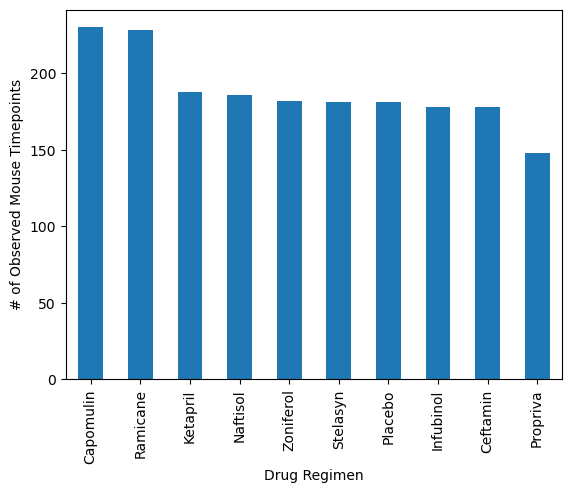

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ttp = no_dupes["Drug Regimen"].value_counts()
ttp.plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show

<BarContainer object of 10 artists>

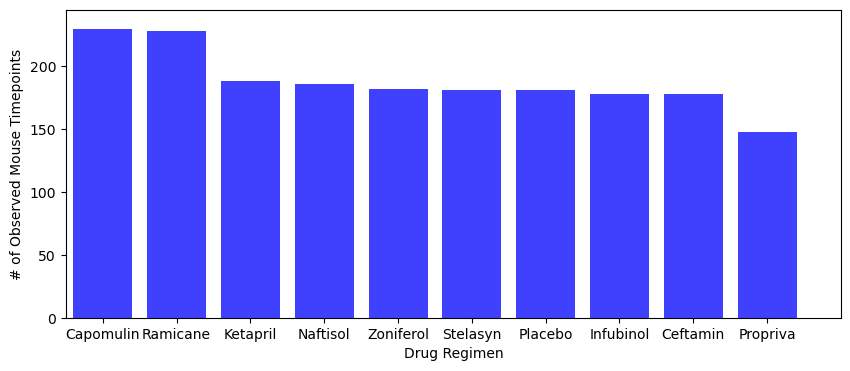

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = ttp.index.values
y_axis = ttp
plt.figure(figsize=(10,4))
plt.xlim(-0.50, len(x_axis))
plt.ylim(0, max(ttp)+15)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, y_axis, color='b', alpha=0.75, align="center")

<function matplotlib.pyplot.show(close=None, block=None)>

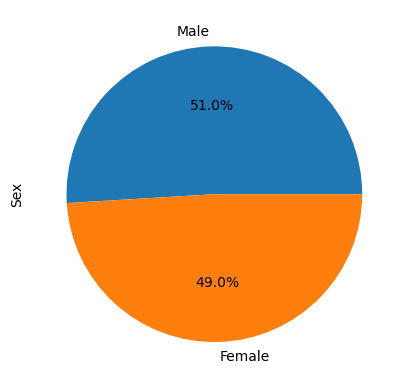

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ttp = no_dupes["Sex"].value_counts()
labels = ['Male', 'Female']

pie = ttp.plot(kind = "pie", autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show

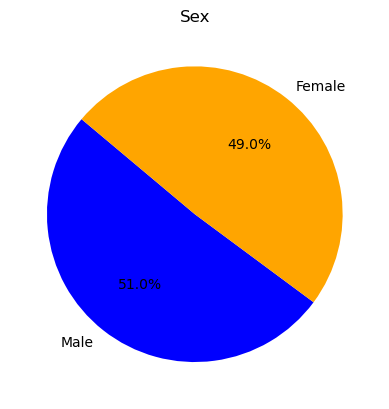

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
g_tot = no_dupes["Sex"].count()
g_count = no_dupes.groupby("Sex")["Mouse ID"].count()
male_percent = g_count["Male"]/g_tot * 100
female_percent = g_count["Female"]/g_tot * 100
tot_percents = [male_percent, female_percent]

labels = ["Male", "Female"]
colors = ["blue", "orange"]
explode = (0, 0)

plt.pie(tot_percents, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_time = no_dupes.groupby(["Mouse ID"])["Timepoint"].max()
great_time = great_time.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged = great_time.merge(no_dupes, on=['Mouse ID','Timepoint'],how="left")
merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
spec_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. (for each regimen)
for regimen in spec_drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_df = merged.loc[(merged["Drug Regimen"] == regimen), 'Tumor Volume (mm3)']
    # add subset
    tumor_vol_data.append(regimen_df)
    # Determine outliers using upper and lower bounds
    quartiles = regimen_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = regimen_df.loc[(regimen_df < lower_bound) | (regimen_df > upper_bound)]

    print(f"{regimen}'s potential outliers are: {outlier}")  


Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


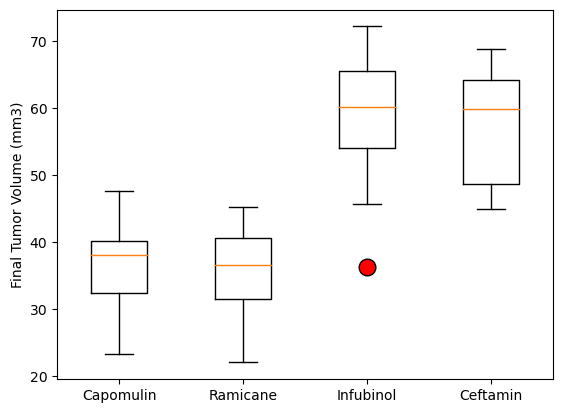

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
out_colour = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data, labels = spec_drugs,flierprops=out_colour)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

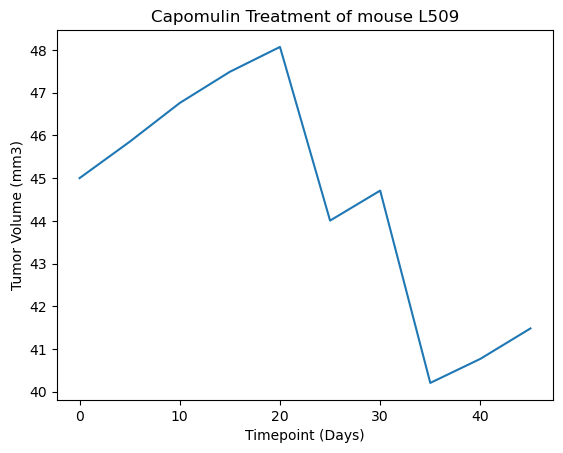

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
subject = no_dupes.loc[(no_dupes["Mouse ID"] == "l509"), :]
x_axis = subject["Timepoint"]
y_axis = subject["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin Treatment of mouse L509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

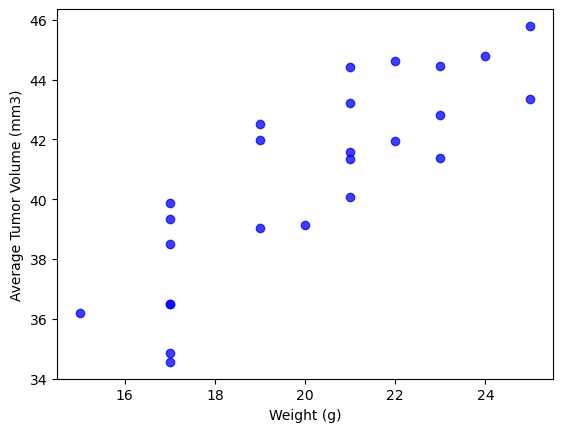

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scat_subject = no_dupes.loc[no_dupes["Drug Regimen"] == "Capomulin"]
scat_average = scat_subject.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
scatter_chart = plt.scatter(scat_average["Weight (g)"], scat_average["Tumor Volume (mm3)"], marker="o", 
                            facecolors="blue", alpha=0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


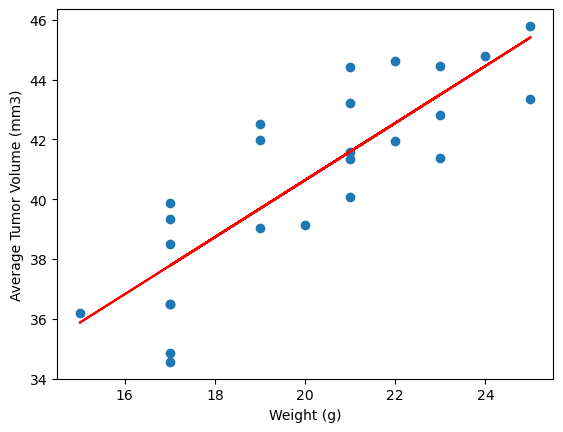

In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weight_capo = scat_average.iloc[:,0]
avg_capo = scat_average.iloc[:, 1]
correlation = st.pearsonr(weight_capo, avg_capo)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_capo, avg_capo)

regress_values = weight_capo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_capo, avg_capo)
plt.plot(weight_capo,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()